In [1]:
import glob
import json
import datetime

import numpy
import pandas

In [2]:
repos = []
for filename in glob.glob("github-physicists/*.json"):
    file = open(filename).read()
    owner = json.loads(file[file.index("[\n"):])
    for repo in owner:
        if not repo["fork"]:
            repos.append({"name": repo["owner"]["login"] + "/" + repo["name"],
                          "date": datetime.datetime.fromisoformat(repo["created_at"].replace("Z", "")),
                          "lang": repo["language"]})

df = pandas.DataFrame(repos)
del repos

In [72]:
df2 = pandas.get_dummies(df, columns=["lang"], prefix="", prefix_sep="")
df2.columns

Index(['date', 'name', 'ASP', 'Arduino', 'Assembly', 'Asymptote', 'Batchfile',
       'C', 'C#', 'C++', 'CMake', 'CSS', 'CoffeeScript', 'Common Lisp', 'Cuda',
       'D', 'DIGITAL Command Language', 'Dockerfile', 'Elm', 'Emacs Lisp',
       'Erlang', 'F#', 'FLUX', 'FORTRAN', 'Fortran', 'GDScript', 'GLSL',
       'Gnuplot', 'Go', 'Groff', 'HCL', 'HTML', 'Haskell', 'Hy', 'IDL', 'Java',
       'JavaScript', 'Julia', 'Jupyter Notebook', 'KiCad', 'Kotlin', 'LLVM',
       'LabVIEW', 'LilyPond', 'Lua', 'M4', 'MATLAB', 'Makefile', 'Mathematica',
       'Matlab', 'Nim', 'Objective-C', 'Objective-J', 'OpenEdge ABL', 'PHP',
       'PLSQL', 'POV-Ray SDL', 'Pascal', 'Perl', 'PostScript', 'PowerShell',
       'Processing', 'Protocol Buffer', 'Puppet', 'Python', 'QML', 'QMake',
       'R', 'RobotFramework', 'Roff', 'Ruby', 'Rust', 'SQLPL', 'Scala',
       'Shell', 'SourcePawn', 'Standard ML', 'Swift', 'SystemVerilog', 'Tcl',
       'TeX', 'TypeScript', 'VHDL', 'Verilog', 'Vim script', 'VimL',
       

In [73]:
df2["year"] = df2["date"].dt.year
# df2 = df2[(2010 <= df2["year"]) & (df2["year"] < 2019)]
df2["C/C++"] = df2["C"] + df2["C++"]
df2["FORTRAN"] = df2["FORTRAN"] + df2["Fortran"]
del df2["Fortran"]

In [74]:
df.groupby("lang").count().sort_values("name", ascending=False)

,date,name
lang,,
C++,3629,3629
Python,3198,3198
C,1094,1094
Jupyter Notebook,551,551
TeX,405,405
Shell,343,343
JavaScript,273,273
HTML,234,234
Java,165,165


In [75]:
langs = ["C/C++", "Python", "Jupyter Notebook", "TeX", "Java", "R", "VHDL", "FORTRAN", "Julia", "Go"]
summary = df2[["year"] + langs].groupby("year").sum()
summary["total"] = sum(summary[x] for x in langs)

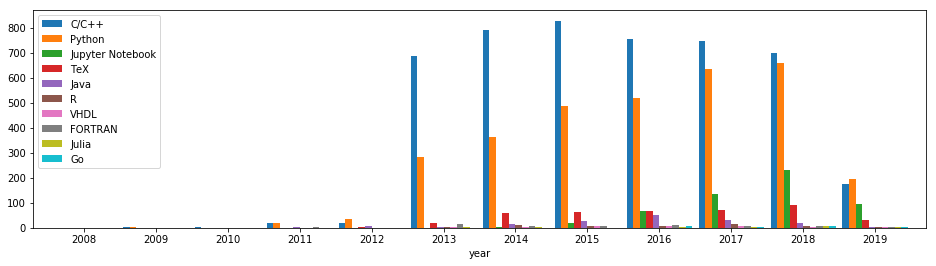

In [90]:
ax = summary[langs].plot.bar(width=(len(langs)/(len(langs) + 1)), logy=False, figsize=(16, 4), rot=0, legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc="upper left")
ax.get_figure().savefig("physicist-github-languages-lin.png")
ax.get_figure().savefig("physicist-github-languages-lin.pdf")

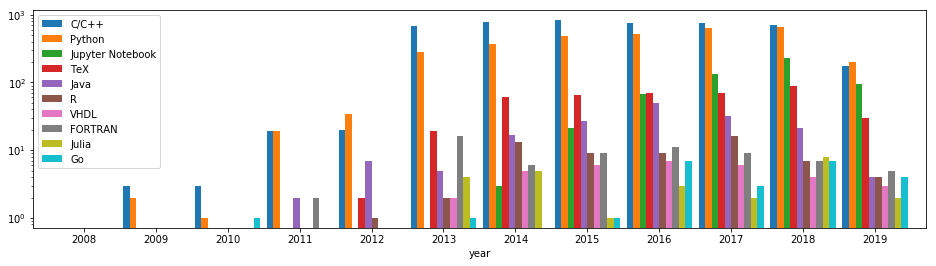

In [91]:
ax = summary[langs].plot.bar(width=(len(langs)/(len(langs) + 1)), logy=True, figsize=(16, 4), rot=0, legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc="upper left")
ax.get_figure().savefig("physicist-github-languages-log.png")
ax.get_figure().savefig("physicist-github-languages-log.pdf")

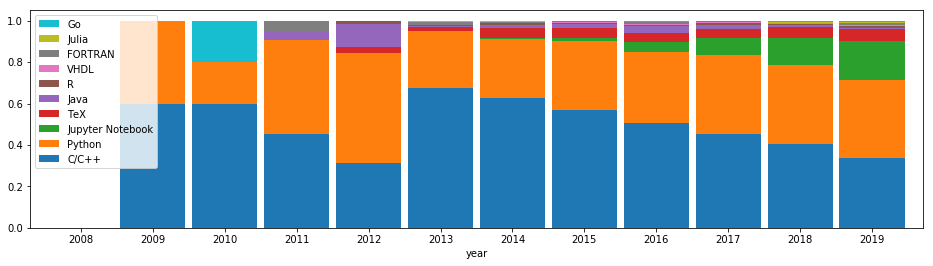

In [92]:
ratio = summary.copy()
for x in langs:
    ratio[x] = summary[x] / summary["total"]

ax = ratio[langs].plot.bar(width=(len(langs)/(len(langs) + 1)), stacked=True, figsize=(16, 4), rot=0, legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(reversed(patches), reversed(labels), loc="upper left")
ax.get_figure().savefig("physicist-github-languages-frac.png")
ax.get_figure().savefig("physicist-github-languages-frac.pdf")